<a href="https://colab.research.google.com/github/DerivativeJRM07/gaming_data_analysis/blob/main/gaming_EDA_jrm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Exploratory Data Analysis***

---



In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('/content/drive/MyDrive/Gaming_data_analysis_jrm/gaming_data_ready_for_eda.csv')

In [29]:
print(df.columns)

Index(['age', 'gender', 'occupation', 'game_type', 'daily_gaming_hours',
       'peak_time', 'sleep_hours', 'stress_level', 'focus_level',
       'performance', 'productivity_level', 'performance_impact',
       'impact_score', 'health_index', 'gamer_type'],
      dtype='object')


## ***Univariate Analysis***
---

Examining each variable in your dataset individually to understand its own patterns, without looking at how it relates to other variables yet.

**Three types of Univariate Analysis**


1.   Categorial : count plot (bar graph) (ex.: gamer_type, gender)
2.   Numerical : Histogram (ex.: daily_gaming_type, age)

---


*Categorial analysis : countplot on gamer_type*


--------Counts per category--------
gamer_type
Regular     544
casual      270
Hardcore    186
Name: count, dtype: int64


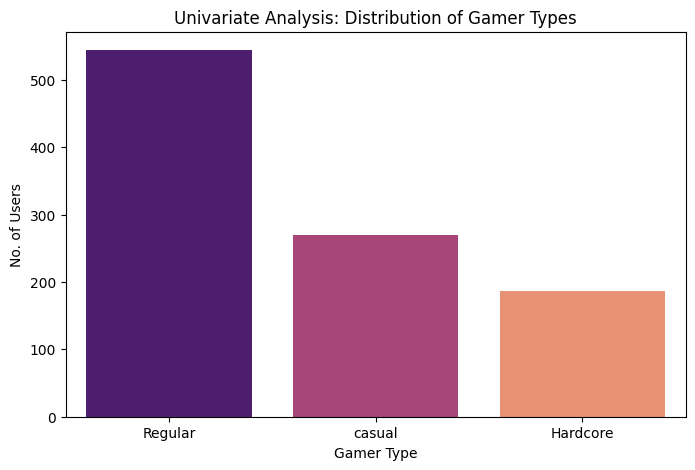

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(data = df, x='gamer_type',hue='gamer_type', palette= 'magma', order=['Regular','casual','Hardcore'], legend=False)
print("\n--------Counts per category--------")
print(df['gamer_type'].value_counts())
plt.title('Univariate Analysis: Distribution of Gamer Types')
plt.xlabel('Gamer Type')
plt.ylabel('No. of Users')
plt.show()

---
*Categorial Analysis: countplot on gender*


--------count per category--------
gender
Female    513
Male      487
Name: count, dtype: int64


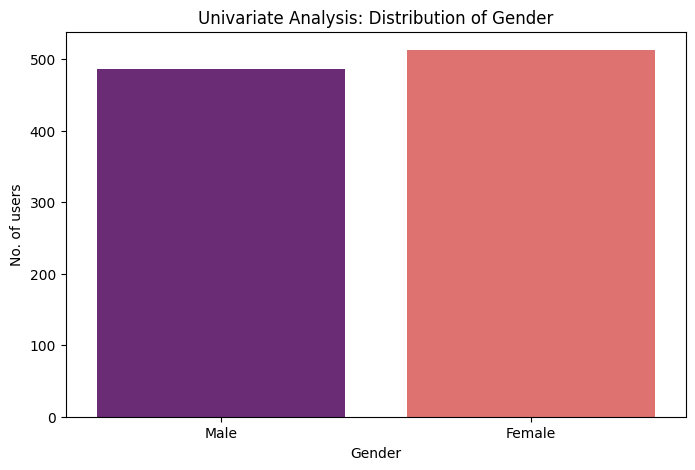

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(data = df, x='gender',hue='gender', palette='magma', order=['Male','Female'], legend=False)
print("\n--------count per category--------")
print(df['gender'].value_counts())
plt.title('Univariate Analysis: Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('No. of users')
plt.show()

---
*Numerical Analysis: Histogram on daily_gaming_hours*

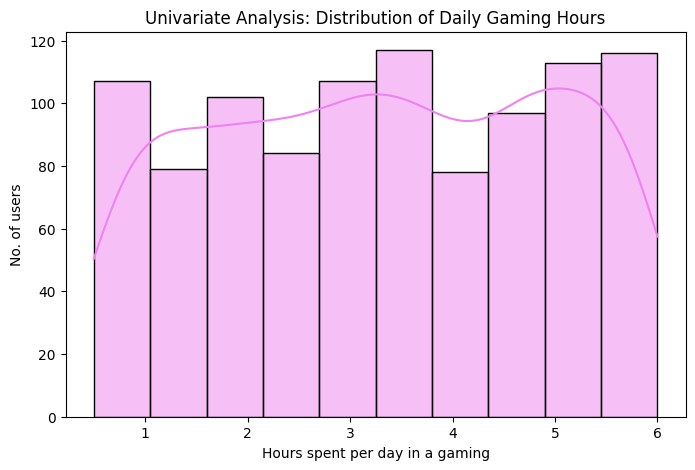

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(df['daily_gaming_hours'], bins=10, kde=True, color='violet')
plt.title('Univariate Analysis: Distribution of Daily Gaming Hours')
plt.xlabel('Hours spent per day in a gaming')
plt.ylabel('No. of users')
plt.show()

---
*Numerical analysis: Histogram on age*

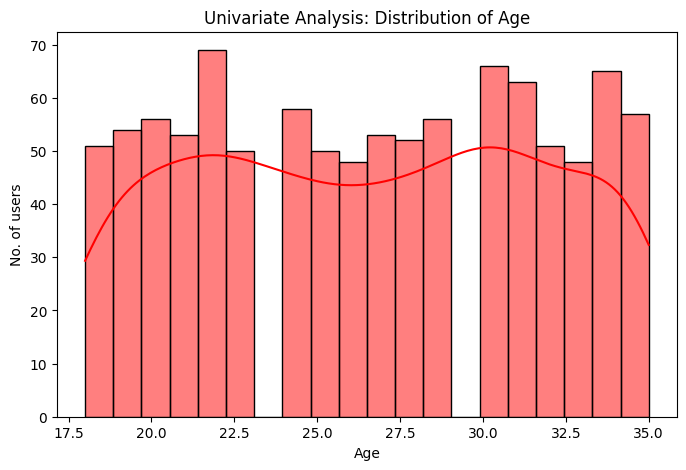

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], kde=True, color='red', bins=20)
plt.title('Univariate Analysis: Distribution of Age')
plt.xlabel('Age')
plt.ylabel('No. of users')
plt.show()


## ***Bivariate Analysis***
---

It is the simultaneous analysis of two variables to determine the relationship, association, or correlation between them.

**Three Types of bivariate analysis**
1. Numerical v/s Numerical: Scatter plot (daily_gaming_hours V/S stress_level)
2. Categorial v/s Numerical: Box plot (gamer_type V/S sleep)
3. Categorial v/s Categorial: heatmap (gender V/S gamer_type)

---


*Num v/s  Num : Scatter plot on daily_gaming_hours v/s stress_level*

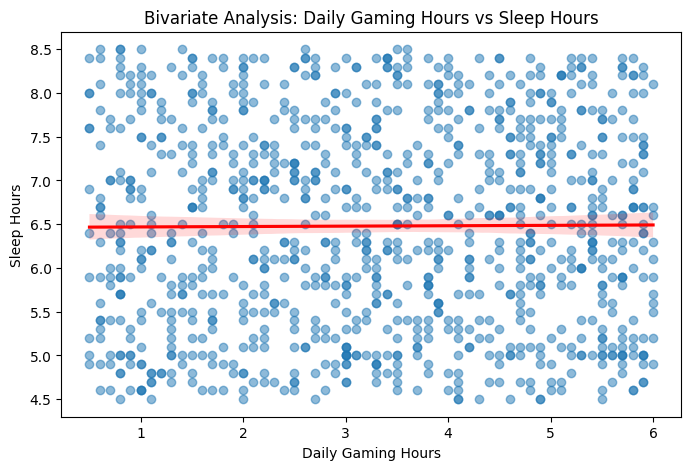

In [34]:
plt.figure(figsize=(8,5))
sns.regplot(data=df, x='daily_gaming_hours', y='sleep_hours', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Bivariate Analysis: Daily Gaming Hours vs Sleep Hours')
plt.xlabel('Daily Gaming Hours')
plt.ylabel('Sleep Hours')
plt.show()

---
*Cat v/s Num: Box plot on gender v/s sleep_hours*

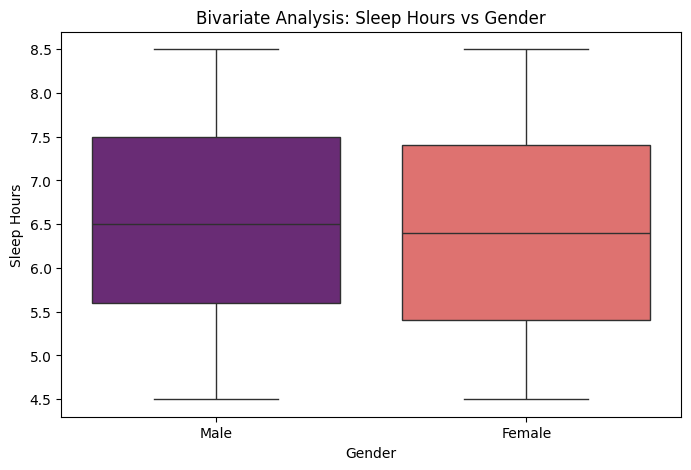

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='gender', y='sleep_hours', palette='magma', hue='gender', legend=False)
plt.xlabel('Gender')
plt.ylabel('Sleep Hours')
plt.title('Bivariate Analysis: Sleep Hours vs Gender')
plt.show()

---
*Cat v/s Cat: Heatmap on gamer_type v/s gender*

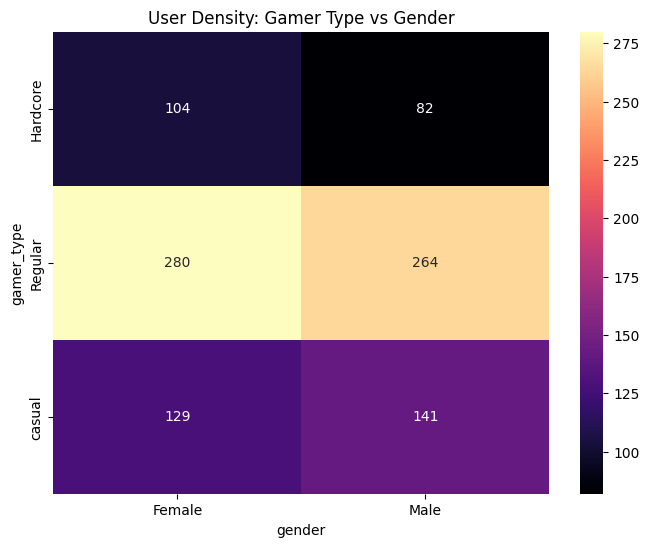

In [36]:
pivot_table = pd.crosstab(df['gamer_type'], df['gender'])
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='magma', fmt='d')
plt.title('User Density: Gamer Type vs Gender')
plt.show()

## *Multivariate Analysis*
---
*simple idea*

- Univariate: You look at a person and say, "They play 5 hours of games." (One fact).

- Bivariate: You say, "They play 5 hours, so they only sleep 6 hours." (A link between two facts).

- Multivariate: You say, "They play 5 hours and sleep 6 hours, but does that change because they are a student vs. a working professional?" (Adding a third fact to see the "Full Story").

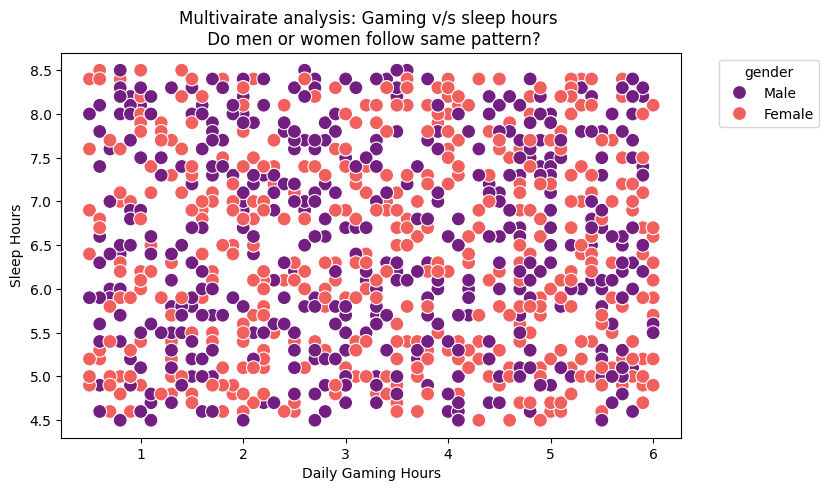

In [37]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='daily_gaming_hours', y='sleep_hours', hue='gender', palette='magma', s=100)
plt.title('Multivairate analysis: Gaming v/s sleep hours \n Do men or women follow same pattern?')
plt.xlabel('Daily Gaming Hours')
plt.ylabel('Sleep Hours')
plt.legend(title='gender', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

*Mixed Colors:* - If the Purple (Male) and Pink (Female) dots are all mixed together, it means Gender doesn't matter—everyone loses sleep the same way.

*Separated Colors:* - If you see one color mostly at the top and the other mostly at the bottom, you’ve found a major insight! It means one group is sleeping significantly more than the other, even if they play the same amount of games.

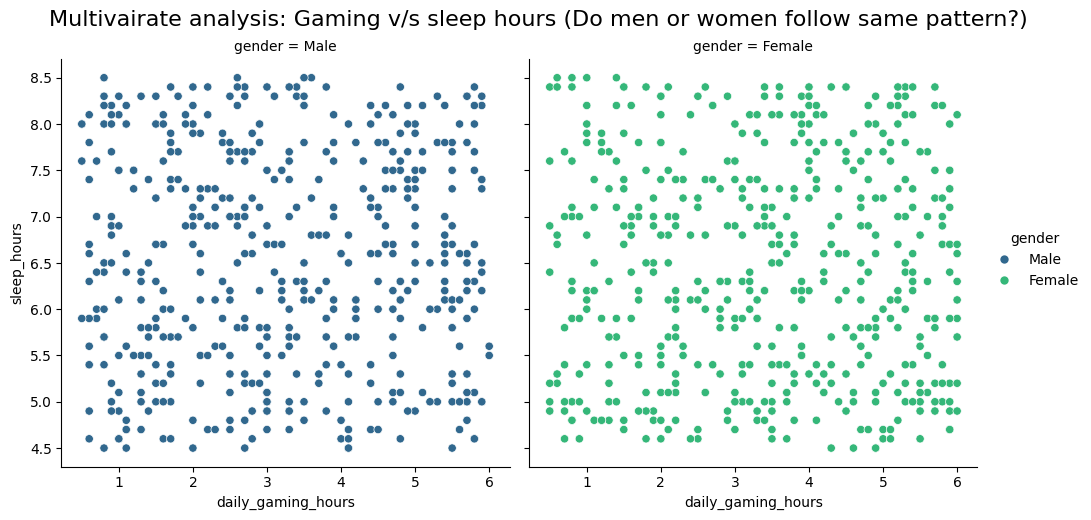

In [38]:
g = sns.relplot(data=df, x='daily_gaming_hours', y='sleep_hours', col='gender', hue='gender', palette='viridis', kind='scatter', height=5, aspect=1)
g.fig.suptitle('Multivairate analysis: Gaming v/s sleep hours (Do men or women follow same pattern?)', y=1.03, fontsize=16)
plt.show()

the pairplot is used for get all the charts of all the columns.

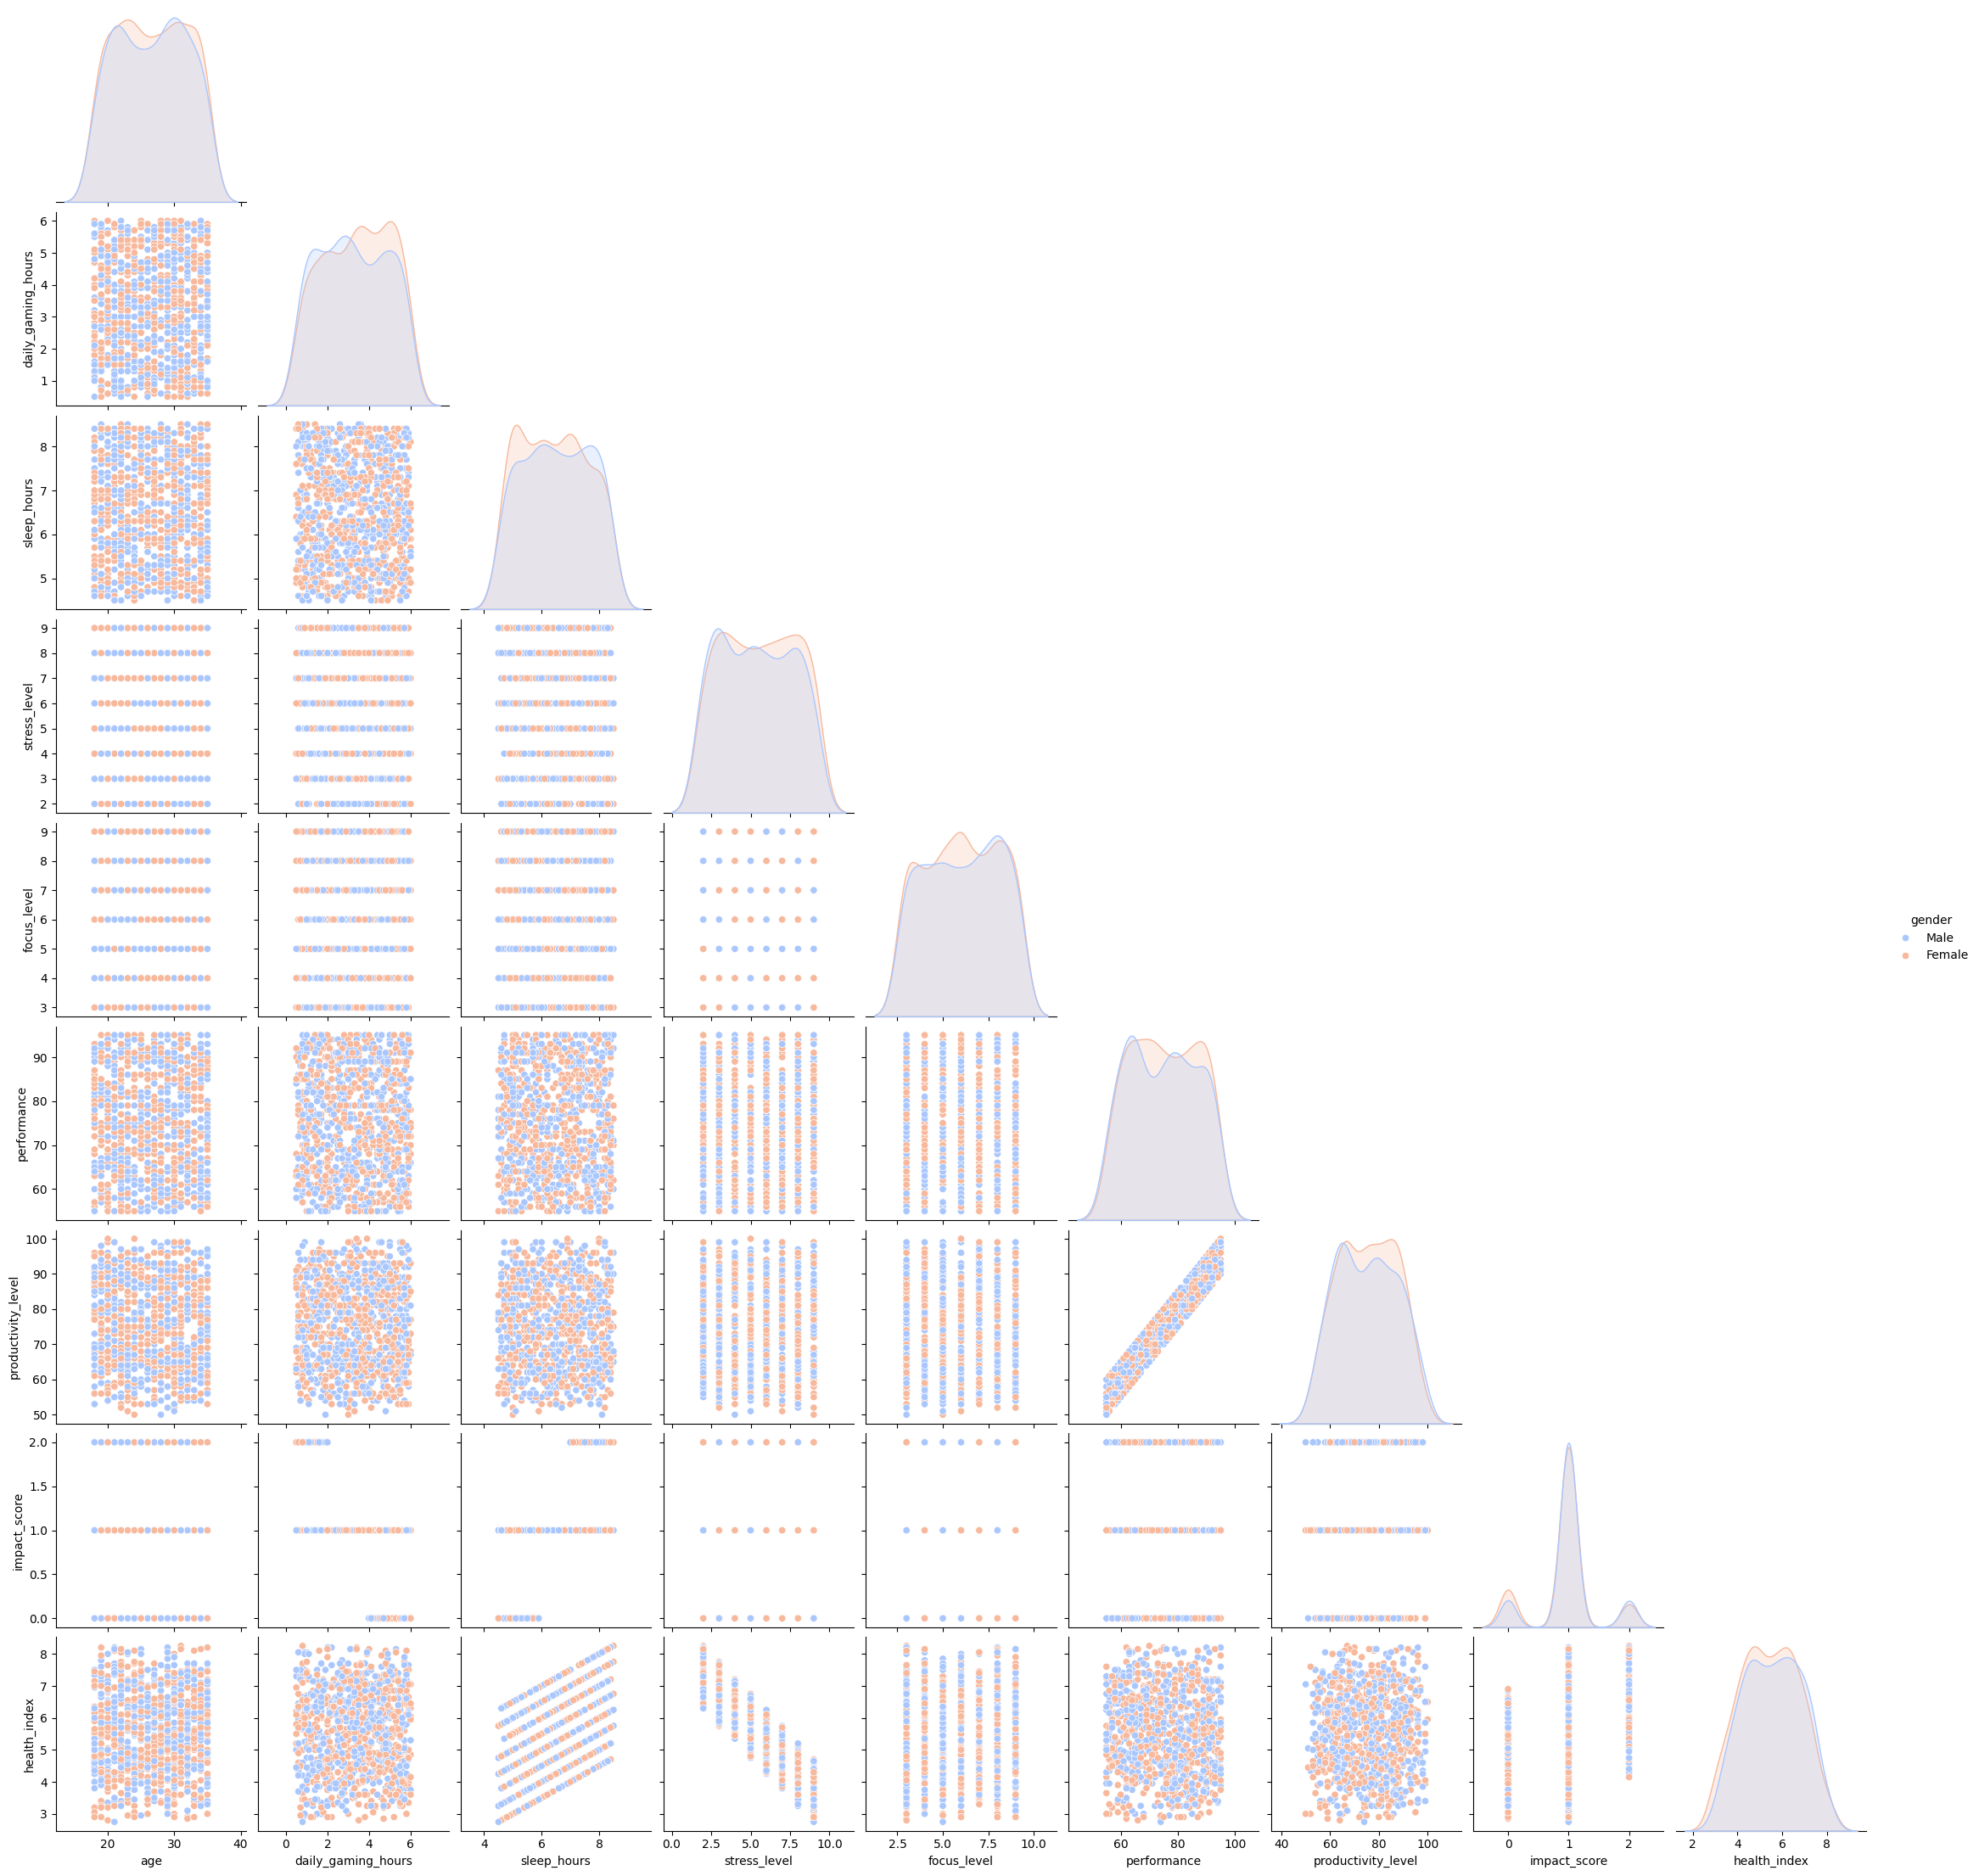

In [40]:
sns.pairplot(df, hue='gender', palette='coolwarm', corner=True)
plt.show()